In [ ]:
import pandas_datareader as pdr

In [ ]:
df=pdr.get_data_tiingo("AAPL",api_key="")

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
df

close      high  ...  divCash  splitFactor
symbol date                                         ...                      
AAPL   2016-08-01 00:00:00+00:00  106.05  106.1500  ...     0.00          1.0
       2016-08-02 00:00:00+00:00  104.48  106.0700  ...     0.00          1.0
       2016-08-03 00:00:00+00:00  105.79  105.8400  ...     0.00          1.0
       2016-08-04 00:00:00+00:00  105.87  106.0000  ...     0.57          1.0
       2016-08-05 00:00:00+00:00  107.48  107.6500  ...     0.00          1.0
...                                  ...       ...  ...      ...          ...
       2021-07-22 00:00:00+00:00  146.80  148.1950  ...     0.00          1.0
       2021-07-23 00:00:00+00:00  148.56  148.7177  ...     0.00          1.0
       2021-07-26 00:00:00+00:00  148.99  149.8300  ...     0.00          1.0
       2021-07-27 00:00:00+00:00  146.77  149.2100  ...     0.00          1.0
       2021-07-28 00:00:00+00:00  144.98  146.9700  ...     0.00          1.0

[1257 rows x 12 columns]

In [ ]:
#Taking only close value
df1=df.reset_index()['close']

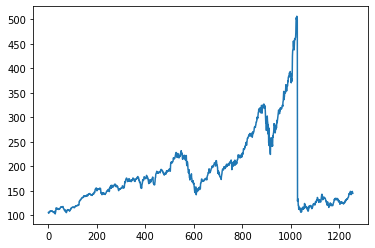

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(1257, 1)

In [ ]:
#We will do timeseries based train test split
train_size=int(len(df1)*0.65)
test_size=int(len(df1)*0.35)
train_data=df1[:train_size]
test_data=df1[train_size:] 

In [ ]:
train_data=train_data.reshape(train_data.shape[0])
test_data=test_data.reshape(test_data.shape[0])

In [ ]:
train_data.shape

(817,)

In [ ]:
#creating dataset with 100 timestamp value which means we are making dataset like (0th to 99th day) price as X and 100th day price as Y
def create_dataset(data):
  X=[]
  Y=[]
  for i in range(len(data)-101):
    X.append(data[i:i+100])
    Y.append(data[i+101])
  return X,Y
X_train,Y_train=create_dataset(train_data)
X_test,Y_test=create_dataset(test_data)

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [ ]:
X_train.shape

(716, 100)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
X_train.shape

(716, 100, 1)

In [ ]:
Y_test=np.array(Y_test)
Y_train=np.array(Y_train)

Modeling

In [ ]:
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True,activation='relu'))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
12/12 [==============================] - 2s 195ms/step - loss: 1.1242e-04 - val_loss: 0.0362
Epoch 2/20
12/12 [==============================] - 2s 195ms/step - loss: 1.1189e-04 - val_loss: 0.0403
Epoch 3/20
12/12 [==============================] - 2s 197ms/step - loss: 1.1203e-04 - val_loss: 0.0341
Epoch 4/20
12/12 [==============================] - 2s 196ms/step - loss: 1.1011e-04 - val_loss: 0.0533
Epoch 5/20
12/12 [==============================] - 2s 194ms/step - loss: 1.3161e-04 - val_loss: 0.0246
Epoch 6/20
12/12 [==============================] - 2s 199ms/step - loss: 1.2550e-04 - val_loss: 0.0345
Epoch 7/20
12/12 [==============================] - 2s 196ms/step - loss: 1.7851e-04 - val_loss: 0.0430
Epoch 8/20
12/12 [==============================] - 2s 196ms/step - loss: 1.2115e-04 - val_loss: 0.0244
Epoch 9/20
12/12 [==============================] - 2s 196ms/step - loss: 1.1786e-04 - val_loss: 0.0326
Epoch 10/20
12/12 [==============================] - 2s 200ms/st

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
Y_train.shape

(716,)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error


In [ ]:
train_predict[0]

array([114.76955], dtype=float32)

In [ ]:
math.sqrt(mean_squared_error(Y_train,train_predict))

178.12864114547648

In [ ]:
math.sqrt(mean_squared_error(Y_test,test_predict))

266.0486691395515

Plotting Graph

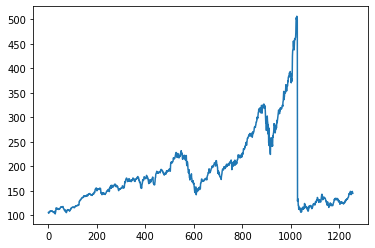

In [ ]:
import matplotlib.pyplot as plt
plt.plot(scaler.inverse_transform(df1))

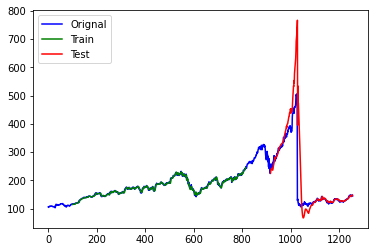

In [ ]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),color="blue",label="Orignal")
plt.plot(trainPredictPlot,color="green",label="Train")
plt.plot(testPredictPlot,color="red",label="Test")
plt.legend()
plt.show()